### [Spatial Joins](https://autogis-site.readthedocs.io/en/latest/notebooks/L3/03_spatial-join.html)

In [3]:
import geopandas as gpd
from pyproj import CRS
import requests
import geojson

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

In [4]:
pop.head()

,geometry,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",688,9,28.0,99,99,99,99,99,99,99,99,99
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",703,5,51.0,99,99,99,99,99,99,99,99,99
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",710,8,44.0,99,99,99,99,99,99,99,99,99
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",711,5,90.0,99,99,99,99,99,99,99,99,99
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",715,11,41.0,99,99,99,99,99,99,99,99,99


In [5]:
pop = pop.rename(columns={'asukkaita': 'pop18'})

pop.columns.values

array(['geometry', 'index', 'pop18', 'asvaljyys', 'ika0_9', 'ika10_19',
       'ika20_29', 'ika30_39', 'ika40_49', 'ika50_59', 'ika60_69',
       'ika70_79', 'ika_yli80'], dtype=object)

In [6]:
pop = pop[['pop18', 'geometry']]

In [7]:
pop.head()

,pop18,geometry
0,9,"POLYGON ((25472499.995 6689749.005, 25472499.9..."
1,5,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
2,8,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
3,5,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
4,11,"POLYGON ((25472499.995 6682998.998, 25472499.9..."


### Join the Layers

In [8]:
addr_file = 'data/addresses.shp'
addr_shapefile = gpd.read_file(addr_file)

In [9]:
addr_shapefile.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Hels...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
3,"Hermannin rantatie, Verkkosaari, Kalasatama, S...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97835 60.18976)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [10]:
addr_shapefile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
pop.crs

In [12]:
pop.crs = CRS.from_epsg(3879).to_wkt()

In [13]:
pop.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - 24.5°E to 25.5°E onshore nominal
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
addr_shapefile.crs == pop.crs

False

In [16]:
addr_shapefile = addr_shapefile.to_crs(pop.crs)

In [17]:
addr_shapefile.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - 24.5°E to 25.5°E onshore nominal
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
addr_shapefile.crs == pop.crs

True

- join the attributes of the two datasets into one encompassing one

In [21]:
join = gpd.sjoin(addr_shapefile, pop, how='inner', op='within')

In [22]:
join.head()

,address,id,addr,geometry,index_right,pop18
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (25495311.608 6672258.695),3252,515
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (25496206.216 6672909.016),3364,182
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Hels...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (25496762.723 6673010.538),3488,38
3,"Hermannin rantatie, Verkkosaari, Kalasatama, S...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (25498798.583 6675215.263),3822,61
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (25495645.995 6671528.068),3298,1435


In [23]:
len(join)

31

In [25]:
len(addr_shapefile)

34

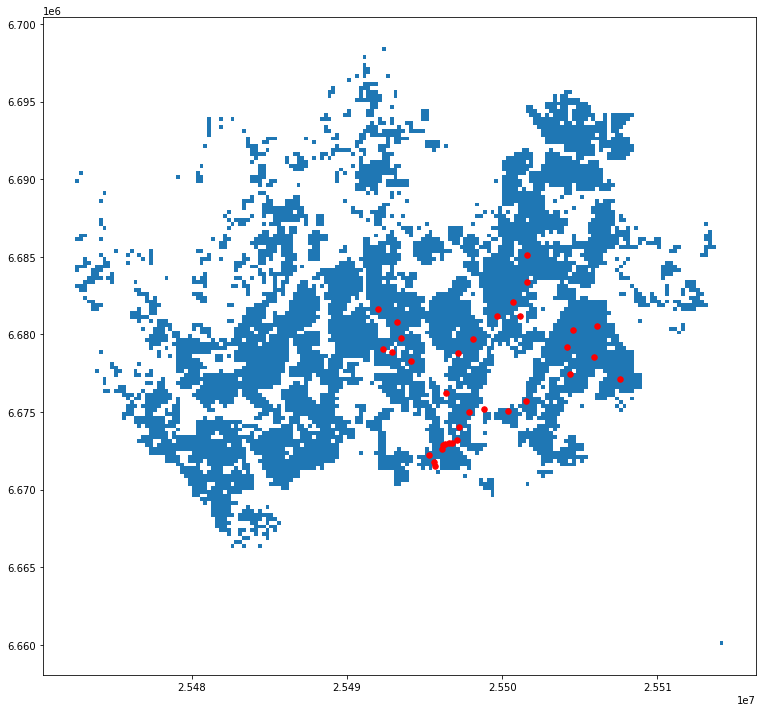

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
pop.plot(ax=ax)
addr_shapefile.plot(ax=ax, color='red', markersize=30)
plt.tight_layout()

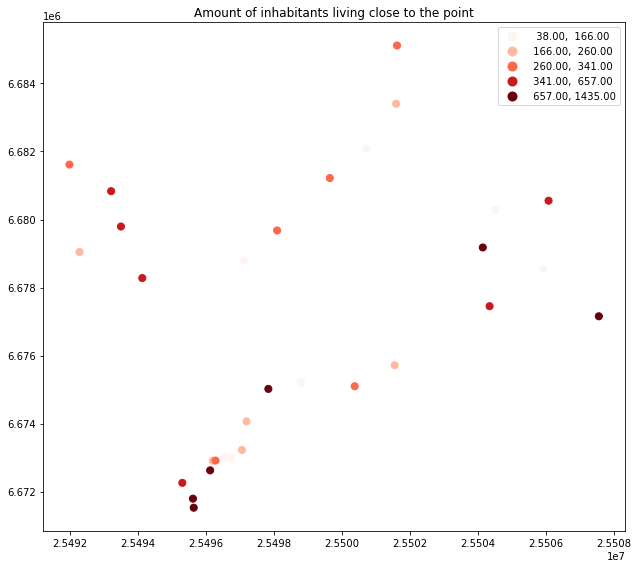

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
join.plot(ax=ax, column='pop18', cmap='Reds', markersize=50, scheme='quantiles', legend=True)
plt.title("Amount of inhabitants living close to the point")
plt.tight_layout()

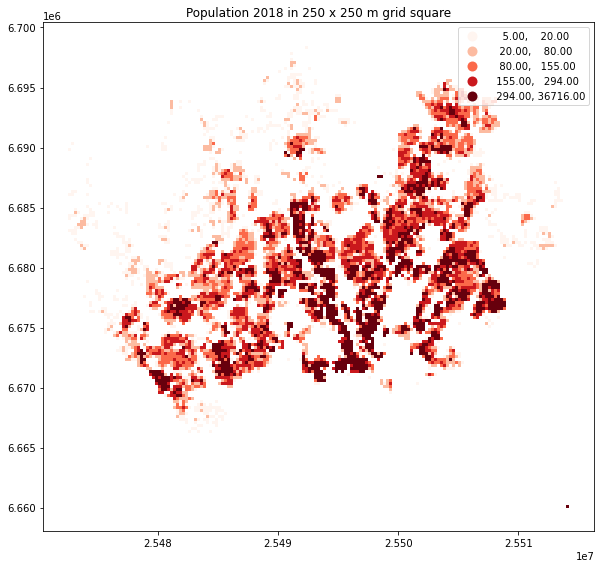

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
pop.plot(ax=ax, column='pop18', cmap='Reds', markersize=50, scheme='quantiles', legend=True)
plt.title("Population 2018 in 250 x 250 m grid square")
plt.tight_layout()

In [37]:
join.to_file('data/spatial_join.shp')

C:\ProgramData\Anaconda3\envs\autogis_lesson2\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\big yeti\AppData\Local\Temp\ipykernel_10348\1174626313.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  join.to_file('data/spatial_join.shp')
